In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = False

C_E_convert = 474600
varname = 'PAR'
factornemo = 1#C_E_convert * 1e-3
factorape = 1  
zmax = 200

## Reading mesh

In [2]:
mesh = xr.open_dataset('one-way/mesh_mask.nc').isel(x=0, y=0)
mesh

<xarray.Dataset>
Dimensions:       (nav_lev: 75, time_counter: 1)
Coordinates:
  * nav_lev       (nav_lev) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * time_counter  (time_counter) float64 0.0
Data variables: (12/51)
    nav_lon       float32 ...
    nav_lat       float32 ...
    jpiglo        int32 ...
    jpjglo        int32 ...
    jpkglo        int32 ...
    jperio        int32 ...
    ...            ...
    e3uw_0        (time_counter, nav_lev) float64 ...
    e3vw_0        (time_counter, nav_lev) float64 ...
    gdept_1d      (time_counter, nav_lev) float64 ...
    gdepw_1d      (time_counter, nav_lev) float64 ...
    gdept_0       (time_counter, nav_lev) float64 ...
    gdepw_0       (time_counter, nav_lev) float64 ...
Attributes:
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [3 3]
    DOMAIN_size_local:       [3 3]
    DOMAIN_position_first:   [1 1]
    DOMAIN_position_last:    [3 3]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX

In [3]:
depth = mesh['gdept_1d'].values[0]
depth.shape

(75,)

In [4]:
iok = np.nonzero(depth <= zmax)[0]
iok

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

## NEMO outputs

In [5]:
data = xr.open_mfdataset('one-way/DYFAMED_[0-9]d*nc').isel(y_grid_T=1, x_grid_T=1, y=1, x=1)
data

<xarray.Dataset>
Dimensions:               (deptht: 75, axis_nbounds: 2, time_counter: 3650, y_grid_W: 3, x_grid_W: 3, depthw: 75, depthu: 75, depthv: 75)
Coordinates:
    nav_lat               float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon               float32 dask.array<chunksize=(), meta=np.ndarray>
  * deptht                (deptht) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    time_centered         (time_counter) object dask.array<chunksize=(3650,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-01 12:00:00 ... 2009-...
    nav_lat_grid_T        float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon_grid_T        float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lat_grid_W        (y_grid_W, x_grid_W) float32 dask.array<chunksize=(3, 3), meta=np.ndarray>
    nav_lon_grid_W        (y_grid_W, x_grid_W) float32 dask.array<chunksize=(3, 3), meta=np.ndarray>
  * depthw                (depthw) float32 0.0 1.024 2.103 ... 5.596e+03 5.8e+03
  * depthu                (depthu) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
  * depthv                (depthv) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
Dimensions without coordinates: axis_nbounds, y_grid_W, x_grid_W
Data variables: (12/23)
    deptht_bounds         (deptht, axis_nbounds) float32 dask.array<chunksize=(75, 2), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(3650, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(3650, 2), meta=np.ndarray>
    O2                    (time_counter, deptht) float32 dask.array<chunksize=(3650, 75), meta=np.ndarray>
    GOC                   (time_counter, deptht) float32 dask.array<chunksize=(3650, 75), meta=np.ndarray>
    POC                   (time_counter, deptht) float32 dask.array<chunksize=(3650, 75), meta=np.ndarray>
    ...                    ...
    depthu_bounds         (depthu, axis_nbounds) float32 dask.array<chunksize=(75, 2), meta=np.ndarray>
    uoce                  (time_counter, depthu) float32 dask.array<chunksize=(3650, 75), meta=np.ndarray>
    uocetr_eff            (time_counter, depthu) float32 dask.array<chunksize=(3650, 75), meta=np.ndarray>
    depthv_bounds         (depthv, axis_nbounds) float32 dask.array<chunksize=(75, 2), meta=np.ndarray>
    voce                  (time_counter, depthv) float32 dask.array<chunksize=(3650, 75), meta=np.ndarray>
    vocetr_eff            (time_counter, depthv) float32 dask.array<chunksize=(3650, 75), meta=np.ndarray>
Attributes:
    name:         DYFAMED_1d_20000101_20091231_ptrc_T
    description:  pisces sms variables
    title:        pisces sms variables
    Conventions:  CF-1.6
    timeStamp:    2021-Dec-16 10:21:35 GMT
    uuid:         17ea35ae-f04d-4ec4-bc21-c1c93c237126

In [6]:
nemo = data[varname] * factornemo
nemo

<xarray.DataArray 'PAR' (time_counter: 3650, deptht: 75)>
dask.array<mul, shape=(3650, 75), dtype=float32, chunksize=(3650, 75), chunktype=numpy.ndarray>
Coordinates:
    nav_lat         float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon         float32 dask.array<chunksize=(), meta=np.ndarray>
  * deptht          (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time_centered   (time_counter) object dask.array<chunksize=(3650,), meta=np.ndarray>
  * time_counter    (time_counter) object 2000-01-01 12:00:00 ... 2009-12-31 ...
    nav_lat_grid_T  float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon_grid_T  float32 dask.array<chunksize=(), meta=np.ndarray>

## One way coupling

In [7]:
data = xr.open_mfdataset('one-way/output_apecosm/*nc').isel(x=1, y=1)
data

<xarray.Dataset>
Dimensions:  (time: 3650, dn: 2, depth: 75, c: 3, size_group: 5, w: 100)
Coordinates:
  * time     (time) object 2000-01-01 12:00:00 ... 2009-12-31 12:00:00
Dimensions without coordinates: dn, depth, c, size_group, w
Data variables:
    FORAGE   (time, dn, depth, c, size_group) float32 dask.array<chunksize=(73, 2, 75, 3, 5), meta=np.ndarray>
    OOPE     (time, c, w) float32 dask.array<chunksize=(73, 3, 100), meta=np.ndarray>
    forcing  (time, depth) float32 dask.array<chunksize=(73, 75), meta=np.ndarray>

In [8]:
oneway = data['forcing']
oneway

<xarray.DataArray 'forcing' (time: 3650, depth: 75)>
dask.array<getitem, shape=(3650, 75), dtype=float32, chunksize=(73, 75), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2000-01-01 12:00:00 ... 2009-12-31 12:00:00
Dimensions without coordinates: depth

## Comparison with old forcings

In [9]:
data = xr.open_mfdataset('/home/barrier/Work/codes/nemo/release-4.0.6/cfgs/C1D_PISCES/EXP00/DYFAMED*1d*nc').isel(y_grid_T=1, x_grid_T=1, y=1, x=1)
data

test = data[varname] * factornemo
test

<xarray.DataArray 'PAR' (time_counter: 1095, deptht: 75)>
dask.array<mul, shape=(1095, 75), dtype=float32, chunksize=(1095, 75), chunktype=numpy.ndarray>
Coordinates:
  * time_counter    (time_counter) object 2000-01-01 12:00:00 ... 2002-12-31 ...
    nav_lat         float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon         float32 dask.array<chunksize=(), meta=np.ndarray>
  * deptht          (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time_centered   (time_counter) object dask.array<chunksize=(1095,), meta=np.ndarray>
    nav_lat_grid_T  float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon_grid_T  float32 dask.array<chunksize=(), meta=np.ndarray>

## Making plots

Text(0.5, 1.0, 'TEST')

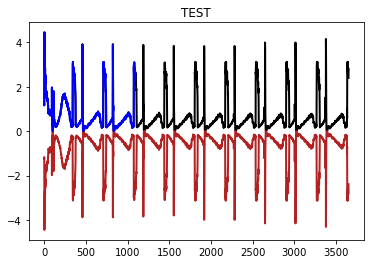

In [44]:
plt.figure()
iii = 20
#ax1 = plt.subplot(311)
ntime = oneway.shape[0]
time = np.arange(ntime)
toplot = oneway
toplot = np.ma.masked_where(toplot==0, toplot)
# cs1 = plt.pcolor(time, -depth[iok], toplot.T[iok, :], shading='auto')
# plt.colorbar(cs1)
plt.plot(toplot[:, iii])
plt.title('Apecosm')

#ax2 = plt.subplot(312)
ntime = nemo.shape[0]
time = np.arange(ntime)
toplot = nemo.values
toplot = np.ma.masked_where(toplot==0, toplot)
#cs2 = plt.pcolor(time, -depth[iok], toplot.T[iok, :], shading='auto')
# plt.colorbar(cs2)
plt.plot(-toplot[:, iii])
plt.title('NEMO')
#cs1.set_clim(cs2.get_clim())
#ax2.set_xlim(ax1.get_xlim())
#ax2.set_ylim(ax1.get_ylim())

#ax3 = plt.subplot(313)
ntime = nemo.shape[0]
time = np.arange(ntime)
toplot = test.values
toplot = np.ma.masked_where(toplot==0, toplot)
# cs2 = plt.pcolor(time, -depth[iok], toplot.T[iok, :], shading='auto')
# plt.colorbar(cs2)
plt.plot(toplot[:, iii], color='blue')
plt.title('TEST')
#cs1.set_clim(cs2.get_clim())
#ax3.set_xlim(ax1.get_xlim())
#ax3.set_ylim(ax1.get_ylim())

In [37]:
toplot[0, iii]

7.1928434

In [12]:
oneway

<xarray.DataArray 'forcing' (time: 3650, depth: 75)>
dask.array<getitem, shape=(3650, 75), dtype=float32, chunksize=(73, 75), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2000-01-01 12:00:00 ... 2009-12-31 12:00:00
Dimensions without coordinates: depth

In [13]:
nemo

<xarray.DataArray 'PAR' (time_counter: 3650, deptht: 75)>
dask.array<mul, shape=(3650, 75), dtype=float32, chunksize=(3650, 75), chunktype=numpy.ndarray>
Coordinates:
    nav_lat         float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon         float32 dask.array<chunksize=(), meta=np.ndarray>
  * deptht          (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time_centered   (time_counter) object dask.array<chunksize=(3650,), meta=np.ndarray>
  * time_counter    (time_counter) object 2000-01-01 12:00:00 ... 2009-12-31 ...
    nav_lat_grid_T  float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon_grid_T  float32 dask.array<chunksize=(), meta=np.ndarray>

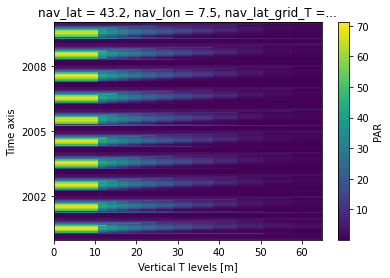

In [14]:
idepth = slice(0, 20)
nemo.isel(deptht=idepth).plot()

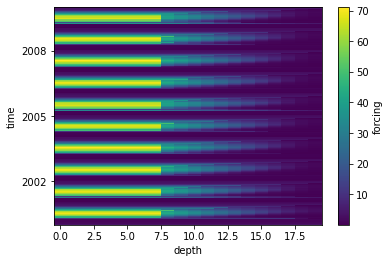

In [15]:
oneway.isel(depth=idepth).plot()